> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a the NoShow Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

A number of characteristics about the patient are included in each row:
    <p>**ScheduledDay** : tells us on what day the patient set up their appointment.</p>
    <p>**Neighborhood** :location of the hospital.</p>
    <p>**Scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program.</p>
    
    
## Questions    
We Need to check the influence of given attributes in the correlation between them and the no show.
     <p>**Gender**: which gender have more no show</p>
     <p>**Age**: Expected no show high proportion in which age</p>
     <p>**Waiting Time**: Is the waiting time increase or decrease the no show</p>

In [1]:
# Use this cell to set up import statements for all of the packages that

#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('data/noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

In [28]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [29]:
# displays a concise summary of the dataframe,
# including the number of non-null values in each column, appearing no null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [30]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [31]:
#returns useful descriptive statistics for each column of data for numercial values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [3]:
# ScheduledDay & AppointmentDay set as object, need conversion to daytime
#Let's get the values of it
df['ScheduledDay'].value_counts()   
df['AppointmentDay'].value_counts() 
#the hour in AppointmentDay is set to 00:00:00Z so no hour information

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [4]:
#Split by T so first part is Day and second is time for ScheduledDay and day for AppointmentDay
df['SD_Day']=df['ScheduledDay'].str.split('T').str[0]
#I will again take the string after split and take part2 with index 1 then remove Z by remove last digit using index [:-1]
df['SD_hour']=df['ScheduledDay'].str.split('T').str[1].str[:-1]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25


In [5]:
#Convert also appoitment date into date time format
df['App_Day']=df['AppointmentDay'].str.split('T').str[0]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29


In [99]:
#confirm data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
SD_Day            110527 non-null object
SD_hour           110527 non-null object
App_Day           110527 non-null object
dtypes: float64(1), int64(8), object(8)
memory usage: 14.3+ MB


In [6]:
#Need to convert type as still object
df['SD_Day']=df['SD_Day'].astype('datetime64[ns]')
#df['SD_hour']=df['SD_hour'].astype('datetime64[ns]')    --> ignore, was converted back to date with fixed day
df['App_Day']=df['App_Day'].astype('datetime64[ns]')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29


In [101]:
#confirm data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
SD_Day            110527 non-null datetime64[ns]
SD_hour           110527 non-null object
App_Day           110527 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(6)
memory usage: 14.3+ MB


In [7]:
#Drop Unuseful columns AppointmentID, ScheduledDay, AppointmentDay
df.drop(['AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29


In [102]:
#Check the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
SD_Day            110527 non-null datetime64[ns]
SD_hour           110527 non-null object
App_Day           110527 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(6)
memory usage: 14.3+ MB


In [8]:
#Define wait time to answer the third question
# .dt.days to make difference as int not daytime --> https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
df['wait_time']=(df['App_Day']-df['SD_Day']).dt.days
df


,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day,wait_time
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,0
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29,0
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29,2
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29,2
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29,2
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29,0
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29,2


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
SD_Day            110527 non-null datetime64[ns]
SD_hour           110527 non-null object
App_Day           110527 non-null datetime64[ns]
wait_time         110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(6)
memory usage: 15.2+ MB


In [9]:
#rename it as wait_days as it is in days unit
df.rename(columns={'wait_time':'wait_days'},inplace=True)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day,wait_days
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,0
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29,0
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29,2
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29,2
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29,2
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29,0
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29,2


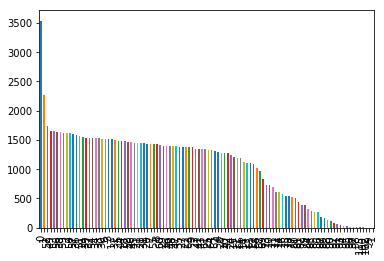

In [10]:
#check the age distribution as bar
df['Age'].value_counts().plot(kind='bar');


In [11]:
#Create column for the Age as groups to have better visibility
# 0-->2:baby, 3-->6:toddler, 7-->18:student, 19-->25:academic, 26-->35:junior, 36-->59:senior, 60+ -->eldy
#Define the bin edges for the cut function
bin_edges=[0,2.5,6.5,18.5,25.5,35.5,59.5,200]
#Define the bin labels
bin_name=['baby','toddler','student','academic','junior','senior','eldy']
#Apply the cut function
df['Age_Category']=pd.cut(df['Age'],bin_edges,labels=bin_name)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SD_Day,SD_hour,App_Day,wait_days,Age_Category
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,0,eldy
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,0,senior
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,0,eldy
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29,0,student
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29,0,senior
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27,08:36:51,2016-04-29,2,eldy
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12,2016-04-29,2,academic
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58,2016-04-29,2,senior
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29,08:02:16,2016-04-29,0,academic
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,12:48:25,2016-04-29,2,academic


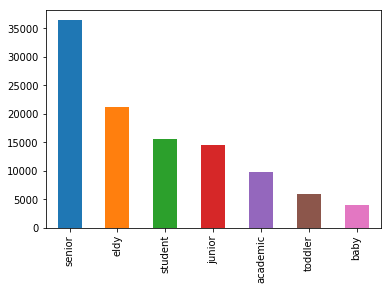

In [12]:
#check the new age distribution as bar
df['Age_Category'].value_counts().plot(kind='bar');

In [13]:
#Change the No show into 0 and 1
# No show--> No -->0, No show -->Yes -->1
df['No-show']=df['No-show'].replace('No','0')
df['No-show']=df['No-show'].replace('Yes','1')
df['No-show']=df['No-show'].astype(int)
#Rename No-show as it produces errors while using query in the exploratory section
df.rename(columns={'No-show':'No_show'},inplace=True)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,SD_Day,SD_hour,App_Day,wait_days,Age_Category
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,0,eldy
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,0,senior
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,0,eldy
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,0,student
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,0,senior
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,0,2016-04-27,08:36:51,2016-04-29,2,eldy
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:05:12,2016-04-29,2,academic
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:39:58,2016-04-29,2,senior
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,0,2016-04-29,08:02:16,2016-04-29,0,academic
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,0,2016-04-27,12:48:25,2016-04-29,2,academic


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which gender have more no show)

In [14]:
#Evaluation of the no show penetration in the dataset

df2 = df.groupby(['No_show']).size().to_frame('count')
df2['percentage']=df2/df2.sum()*100
df2


,count,percentage
No_show,,
0,88208,79.806744
1,22319,20.193256


Text(0.5,1,'Counts of No-show by Gender')

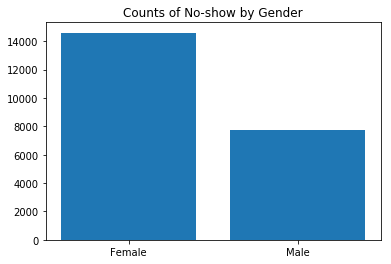

In [32]:
#Plot the show and no-show with respect to gender
gender_noshow=df.groupby('Gender').sum()['No_show']
gender_noshow_c=df.groupby('Gender').count()['No_show']
gender_noshow_prop=gender_noshow/gender_noshow_c*100
plt.bar([1,2],gender_noshow,tick_label=['Female','Male']);
plt.title('Counts of No-show by Gender')


Text(0.5,1,'Proportion of No-show by Gender')

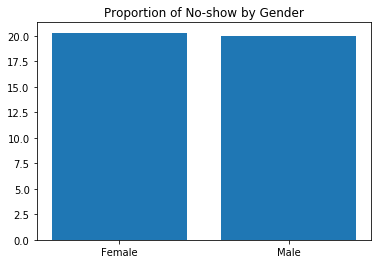

In [33]:
plt.bar([1,2],gender_noshow_prop,tick_label=['Female','Male']);
plt.title('Proportion of No-show by Gender')

<a id='observation'></a>
> **Observation 1:** More no show for female however as proportion appears to be same like male

### No show high proportion in which age

Text(0.5,1,'Counts of No-show by Age_Category')

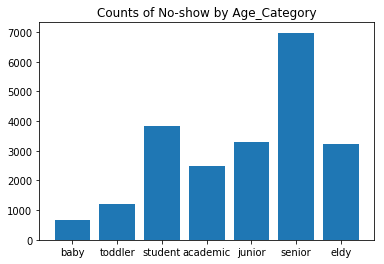

In [46]:
#Plot the show and no-show with respect to 	Age_Category
Age_Category_noshow=df.groupby('Age_Category').sum()['No_show']
Age_Category_noshow_c=df.groupby('Age_Category').count()['No_show']
Age_Category_noshow_prop=Age_Category_noshow/Age_Category_noshow_c*100
labels=['baby','toddler','student','academic','junior','senior','eldy']
plt.bar([1,2,3,4,5,6,7],Age_Category_noshow,tick_label=labels);
plt.title('Counts of No-show by Age_Category')
#Age_Category_noshow,Age_Category_noshow_c,Age_Category_noshow_prop

Text(0.5,1,'Proportion of No-show by Age_Category')

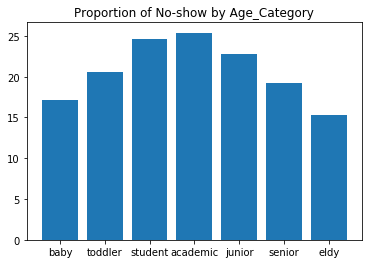

In [47]:
plt.bar([1,2,3,4,5,6,7],Age_Category_noshow_prop,tick_label=labels);
plt.title('Proportion of No-show by Age_Category')

### No-show relation with the wait time

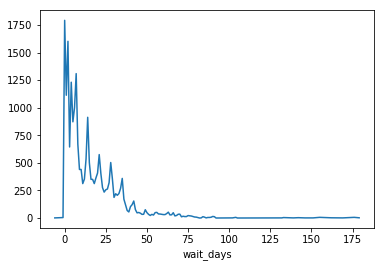

In [52]:
# create line chart where the base is the wait time versus the number of no show
no_show_counts=df.groupby('wait_days').sum()['No_show']
no_show_prop=no_show_counts/df.groupby('wait_days').count()['No_show']
no_show_counts.plot(kind='line')

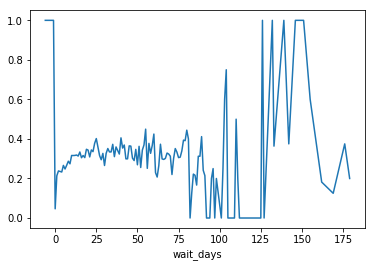

In [53]:
no_show_prop.plot(kind='line')

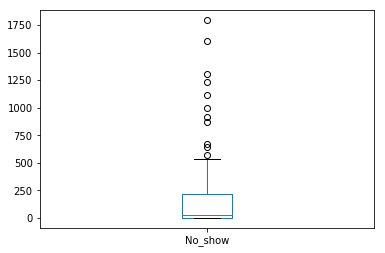

In [55]:
no_show_counts.plot(kind='box')

In [58]:
#It appears there is too much outlier values so will exlude wait days less than 0 and above 100
#High % of above 100 wait time marked as no show
#create data frame with above conditions
df_modified=df.query('wait_days>=0 and wait_days<100')
df_modified['wait_days'].value_counts() 

0     38563
2      6725
4      5290
1      5213
7      4906
6      4037
5      3277
14     2913
3      2737
8      2332
21     1861
28     1706
13     1682
9      1605
15     1503
10     1391
20     1187
22     1173
16     1151
12     1115
17     1107
29     1089
19     1044
18     1021
27     1013
11      987
35      963
23      822
34      808
26      731
      ...  
75       72
68       70
76       65
67       63
90       58
91       56
84       54
72       53
77       53
71       50
74       39
73       37
85       37
78       33
79       23
80       18
89       17
87       16
88       16
81       10
83        8
86        6
98        5
95        5
96        4
92        3
97        2
94        2
93        2
82        1
Name: wait_days, Length: 99, dtype: int64

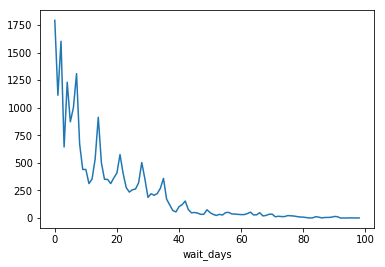

In [59]:
# create line chart where the base is the wait time versus the number of no show for modified dataframe
no_show_counts=df_modified.groupby('wait_days').sum()['No_show']
no_show_prop=no_show_counts/df_modified.groupby('wait_days').count()['No_show']
no_show_counts.plot(kind='line')

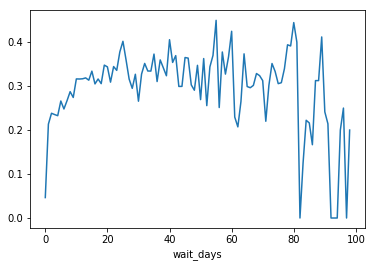

In [60]:
no_show_prop.plot(kind='line')

In [67]:
#group it in bar maybe visibility would be better

#Define the bin edges for the cut function
bin_edges2=[-100,0,5,10,20,30,50,70,100,200,1000]
#Define the bin labels
bin_name2=['Undefined','0-5','5-10','10-20','20-30','30-50','50-70','70-100','100-200','200-1000']
#Apply the cut function
df['Wait interval']=pd.cut(df['wait_days'],bin_edges2,labels=bin_name2)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,SD_Day,SD_hour,App_Day,wait_days,Age_Category,Wait interval
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,0,eldy,Undefined
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,0,senior,Undefined
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,0,eldy,Undefined
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,0,student,Undefined
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,0,senior,Undefined
5,9.598513e+13,F,76,REPÚBLICA,0,1,0,0,0,0,0,2016-04-27,08:36:51,2016-04-29,2,eldy,0-5
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:05:12,2016-04-29,2,academic,0-5
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:39:58,2016-04-29,2,senior,0-5
8,5.639473e+13,F,21,ANDORINHAS,0,0,0,0,0,0,0,2016-04-29,08:02:16,2016-04-29,0,academic,Undefined
9,7.812456e+13,F,19,CONQUISTA,0,0,0,0,0,0,0,2016-04-27,12:48:25,2016-04-29,2,academic,0-5


Text(0.5,1,'Proportion of No-show by Wait interval')

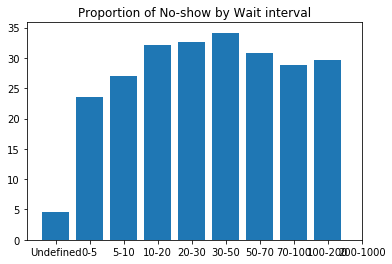

In [70]:
#plotting 

Wait_interval_noshow=df.groupby('Wait interval').sum()['No_show']
Wait_interval_noshow_c=df.groupby('Wait interval').count()['No_show']
Wait_interval_noshow_prop=Wait_interval_noshow/Wait_interval_noshow_c*100

plt.bar([1,2,3,4,5,6,7,8,9,10],Wait_interval_noshow_prop,tick_label=bin_name2);
plt.title('Proportion of No-show by Wait interval')


In [ ]:
#Highest proportion of no show in the interval of wait between 30 and 50 days

<a id='conclusions'></a>
## Conclusions

> **Analysis Point**: The No show is analysied through 3 important metrics: gender, age and wait time

> **Findings**: The proportion of no show for women is slightly higher than men, Highest proportion of no show by age is forinterval between 18 and 25, Highest proportion of no show in the interval of wait between 30 and 50 days

> **Future Analysis**: can analyse the impact of SMS as well as the patient other features like smoke, diabitics, ..